# Predicción de enfermedades del corazón usando redes neuronales

En este codigo se tratara de predecir enfermedades del corazon mediante Redes Neuronales. Los pacientes son clasificados de a cuerdo con diversos grados de enfermedad cronica. El dataset utilizaco consta de 303 pacientes.


In [2]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

print ('Python: {}'.format(sys.version))
print ('Pandas: {}'.format(pd.__version__))
print ('Numpy: {}'.format(np.__version__))
print ('Sklearn: {}'.format(sklearn.__version__))
print ('Matplotlib: {}'.format(matplotlib.__version__))
print ('Keras: {}'.format(keras.__version__))



Using TensorFlow backend.
/home/echartea/python/entronoVirtual/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/echartea/python/entronoVirtual/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/echartea/python/entronoVirtual/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/echartea

Python: 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
Pandas: 1.0.0
Numpy: 1.18.2
Sklearn: 0.22.2.post1
Matplotlib: 3.1.2
Keras: 2.3.1


In [3]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Importacion del Dataset

In [5]:
# import the heart disease dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# the names will be the names of each column in our pandas DataFrame
names = ['age',
        'sex',
        'cp',
        'trestbps',
        'chol',
        'fbs',
        'restecg',
        'thalach',
        'exang',
        'oldpeak',
        'slope',
        'ca',
        'thal',
        'class']

# read the csv
cleveland = pd.read_csv(url, names=names)
# print the shape of the DataFrame, so we can see how many examples we have
print ('Shape of DataFrame: {}'.format(cleveland.shape))
print (cleveland.loc[1])

Shape of DataFrame: (303, 14)
age          67
sex           1
cp            4
trestbps    160
chol        286
fbs           0
restecg       2
thalach     108
exang         1
oldpeak     1.5
slope         2
ca          3.0
thal        3.0
class         2
Name: 1, dtype: object


In [6]:
# print the last twenty or so data points
cleveland.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


# Removemos los datos incompletos

In [7]:
# remove missing data (indicated with a "?")
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [8]:
# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0
290,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,1


# Transformacion de los datos

In [10]:
# print the shape and data type of the dataframe
print (data.shape)
print (data.dtypes)

(297, 14)
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object


In [11]:
# transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object

In [12]:
# print data characteristics, usings pandas built-in describe() function
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


# Imprimimos un histograma por cada variable

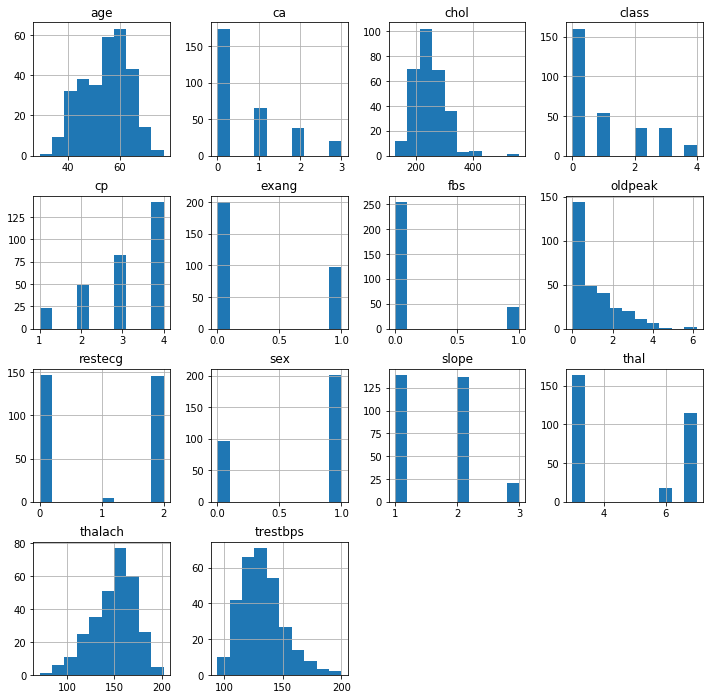

In [13]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()


# Creacion de los datos de entrenamiento y prueba

Ahora que hemos preprocesado los datos adecuadamente, podemos dividirlos en conjuntos de datos de capacitación y pruebas. Utilizaremos la función train_test_split () de Sklearn para generar un conjunto de datos de entrenamiento (80 por ciento de los datos totales) y un conjunto de datos de prueba (20 por ciento de los datos totales).

Además, los valores de clase en este conjunto de datos contienen múltiples tipos de enfermedad cardíaca con valores que van desde 0 (saludable) a 4 (enfermedad cardíaca grave). En consecuencia, necesitaremos convertir nuestros datos de clase en etiquetas categóricas. Por ejemplo, la etiqueta 2 se convertirá en [0, 0, 1, 0, 0].

In [14]:
# create X and Y datasets for training
from sklearn import model_selection

X = np.array(data.drop(['class'], 1))
y = np.array(data['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)


In [16]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(237, 5)
[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


# Construccion y entrenamiento

Ahora que tenemos nuestros datos completamente procesados y divididos en conjuntos de datos de entrenamiento y prueba, podemos comenzar a construir una red neuronal para resolver este problema de clasificación. Usando keras, definiremos una red neuronal simple con una capa oculta. Dado que este es un problema de clasificación categórica, usaremos una función de activación softmax en la capa final de nuestra red y una pérdida de crossentropía categórica durante nuestra fase de entrenamiento.

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 25        
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
# fit the model to the training data
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose = 1)


Epoch 1/100
237/237 [==============================] - 0s 803us/step - loss: 1.8259 - accuracy: 0.3207
Epoch 2/100
237/237 [==============================] - 0s 188us/step - loss: 1.5917 - accuracy: 0.5316
Epoch 3/100
237/237 [==============================] - 0s 180us/step - loss: 1.5802 - accuracy: 0.5316
Epoch 4/100
237/237 [==============================] - 0s 201us/step - loss: 1.5686 - accuracy: 0.5316
Epoch 5/100
237/237 [==============================] - 0s 179us/step - loss: 1.5575 - accuracy: 0.5316
Epoch 6/100
237/237 [==============================] - 0s 175us/step - loss: 1.5465 - accuracy: 0.5316
Epoch 7/100
237/237 [==============================] - 0s 161us/step - loss: 1.5360 - accuracy: 0.5316
Epoch 8/100
237/237 [==============================] - 0s 159us/step - loss: 1.5256 - accuracy: 0.5316
Epoch 9/100
237/237 [==============================] - 0s 118us/step - loss: 1.5154 - accuracy: 0.5316
Epoch 10/100
237/237 [==============================] - 0s 182us/step - 

237/237 [==============================] - 0s 153us/step - loss: 1.3052 - accuracy: 0.5316
Epoch 78/100
237/237 [==============================] - 0s 157us/step - loss: 1.3050 - accuracy: 0.5316
Epoch 79/100
237/237 [==============================] - 0s 164us/step - loss: 1.3047 - accuracy: 0.5316
Epoch 80/100
237/237 [==============================] - 0s 148us/step - loss: 1.3044 - accuracy: 0.5316
Epoch 81/100
237/237 [==============================] - 0s 167us/step - loss: 1.3042 - accuracy: 0.5316
Epoch 82/100
237/237 [==============================] - 0s 162us/step - loss: 1.3040 - accuracy: 0.5316
Epoch 83/100
237/237 [==============================] - 0s 149us/step - loss: 1.3037 - accuracy: 0.5316
Epoch 84/100
237/237 [==============================] - 0s 152us/step - loss: 1.3036 - accuracy: 0.5316
Epoch 85/100
237/237 [==============================] - 0s 167us/step - loss: 1.3033 - accuracy: 0.5316
Epoch 86/100
237/237 [==============================] - 0s 154us/step - loss:

# Mejora de resultados

Aunque logramos resultados prometedores, todavía tenemos un error bastante grande. Esto podría deberse a que es muy difícil distinguir entre los diferentes niveles de gravedad de la enfermedad cardíaca (clases 1 a 4). Simplifiquemos el problema convirtiendo los datos en un problema de clasificación binaria: enfermedad cardíaca o ninguna enfermedad cardíaca.

In [19]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print (Y_train_binary[:20])

[1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0]


In [20]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
# fit the binary model on the training data
binary_model.fit(X_train, Y_train_binary, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
237/237 [==============================] - 0s 678us/step - loss: 0.7036 - accuracy: 0.4937
Epoch 2/100
237/237 [==============================] - 0s 189us/step - loss: 0.6874 - accuracy: 0.5992
Epoch 3/100
237/237 [==============================] - 0s 194us/step - loss: 0.6844 - accuracy: 0.5949
Epoch 4/100
237/237 [==============================] - 0s 233us/step - loss: 0.6810 - accuracy: 0.6076
Epoch 5/100
237/237 [==============================] - 0s 223us/step - loss: 0.6771 - accuracy: 0.6203
Epoch 6/100
237/237 [==============================] - 0s 187us/step - loss: 0.6740 - accuracy: 0.6034
Epoch 7/100
237/237 [==============================] - 0s 223us/step - loss: 0.6699 - accuracy: 0.6709
Epoch 8/100
237/237 [==============================] - 0s 207us/step - loss: 0.6664 - accuracy: 0.6456
Epoch 9/100
237/237 [==============================] - 0s 210us/step - loss: 0.6569 - accuracy: 0.6835
Epoch 10/100
237/237 [==============================] - 0s 219us/step - l

237/237 [==============================] - 0s 181us/step - loss: 0.4639 - accuracy: 0.8143
Epoch 80/100
237/237 [==============================] - 0s 166us/step - loss: 0.4765 - accuracy: 0.7975
Epoch 81/100
237/237 [==============================] - 0s 173us/step - loss: 0.4848 - accuracy: 0.7637
Epoch 82/100
237/237 [==============================] - 0s 170us/step - loss: 0.4420 - accuracy: 0.8481
Epoch 83/100
237/237 [==============================] - 0s 187us/step - loss: 0.4357 - accuracy: 0.8312
Epoch 84/100
237/237 [==============================] - 0s 158us/step - loss: 0.4364 - accuracy: 0.8312
Epoch 85/100
237/237 [==============================] - 0s 188us/step - loss: 0.4346 - accuracy: 0.8354
Epoch 86/100
237/237 [==============================] - 0s 185us/step - loss: 0.4355 - accuracy: 0.8354
Epoch 87/100
237/237 [==============================] - 0s 182us/step - loss: 0.4468 - accuracy: 0.8439
Epoch 88/100
237/237 [==============================] - 0s 154us/step - loss:

# Resultados

Los resultados de precisión que hemos estado viendo son para los datos de entrenamiento, pero ¿qué pasa con el conjunto de datos de prueba? Si nuestros modelos no pueden generalizarse a datos que no se utilizaron para capacitarlos, no proporcionarán ninguna utilidad.

Probemos el rendimiento de nuestro modelo categórico y nuestro modelo binario. Para hacer esto, haremos predicciones sobre el conjunto de datos de entrenamiento y calcularemos métricas de rendimiento usando Sklearn.

In [22]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

Results for Categorical Model
0.5666666666666667
              precision    recall  f1-score   support

           0       0.57      1.00      0.72        34
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         2

    accuracy                           0.57        60
   macro avg       0.11      0.20      0.14        60
weighted avg       0.32      0.57      0.41        60



/home/echartea/python/entronoVirtual/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

Results for Binary Model
0.8833333333333333
              precision    recall  f1-score   support

           0       0.85      0.97      0.90        34
           1       0.95      0.77      0.85        26

    accuracy                           0.88        60
   macro avg       0.90      0.87      0.88        60
weighted avg       0.89      0.88      0.88        60

